### **1. Import Libraries**

Import the required libraries for data manipulation, visualization, preprocessing, and model building.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFECV, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

### **2. Download and Load the Data**

Download the [Airlines Customer satisfaction dataset](https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction) from Kaggle and load it into a pandas DataFrame. Also, display the first few rows of the dataset.


In [2]:
trainData= pd.read_csv('Invistico_Airline.csv')
print("First few rows of the training dataset:")
print(trainData.head())

First few rows of the training dataset:
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...

### **3. Explore the Data**

- Check the dataset information using the `info()` method.
- Check for missing values in the dataset. You can use the `isnull()` method along with the `sum()` method to check the total number of missing values in each column.


In [3]:
print(trainData.info())
print("Null values in the training dataset:")
print(trainData.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

### **4. Data Preprocessing**

#### **4.1 Handle Missing Values**

- The `Arrival Delay in Minutes` column contains missing values. You can fill these missing values using any of the following methods:
  - Fill with the mean, median, or mode of the column using the `SimpleImputer` class from scikit-learn.
  - Impute the missing values using other methods like K-Nearest Neighbors (KNN). Available in the `sklearn.impute` module.


In [4]:
imputer = SimpleImputer(strategy='mean')
trainData['Arrival Delay in Minutes'] = imputer.fit_transform(trainData[['Arrival Delay in Minutes']])
print(trainData.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64


#### **4.2 Encode Categorical Variables**

We have five categorical columns in the dataset,`satisfaction`, `Gender`, `Customer Type`, `Type of Travel`, and `Class`.

- Use the `LabelEncoder` class from scikit to encode the `satisfaction` column as it is the target column.
- Use the `OneHotEncoder` class from scikit-learn or the `get_dummies()` method from pandas to encode the other categorical columns into one-hot vectors.


In [5]:

label_encoder = LabelEncoder()
trainData['satisfaction'] = label_encoder.fit_transform(trainData['satisfaction'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
trainData = pd.get_dummies(trainData, columns=categorical_columns, dtype=int)
print(trainData.info())
print(trainData.head())

{'dissatisfied': 0, 'satisfied': 1}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Age                                129880 non-null  int64  
 2   Flight Distance                    129880 non-null  int64  
 3   Seat comfort                       129880 non-null  int64  
 4   Departure/Arrival time convenient  129880 non-null  int64  
 5   Food and drink                     129880 non-null  int64  
 6   Gate location                      129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Inflight entertainment             129880 non-null  int64  
 9   Online support                     129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  On-

#### **4.3 Visualize Features Correlation**

- Create a heatmap to visualize the correlation between the features using the `seaborn` library. For correlation, you can use the `corr()` method from pandas.
- Observe the correlation between the features and the target column. You can keep the features that have a higher correlation with the target column and drop the rest.

**Note:** The decision to drop or keep features is on you. Bonus points will be awarded if you select the features that gave the best results.


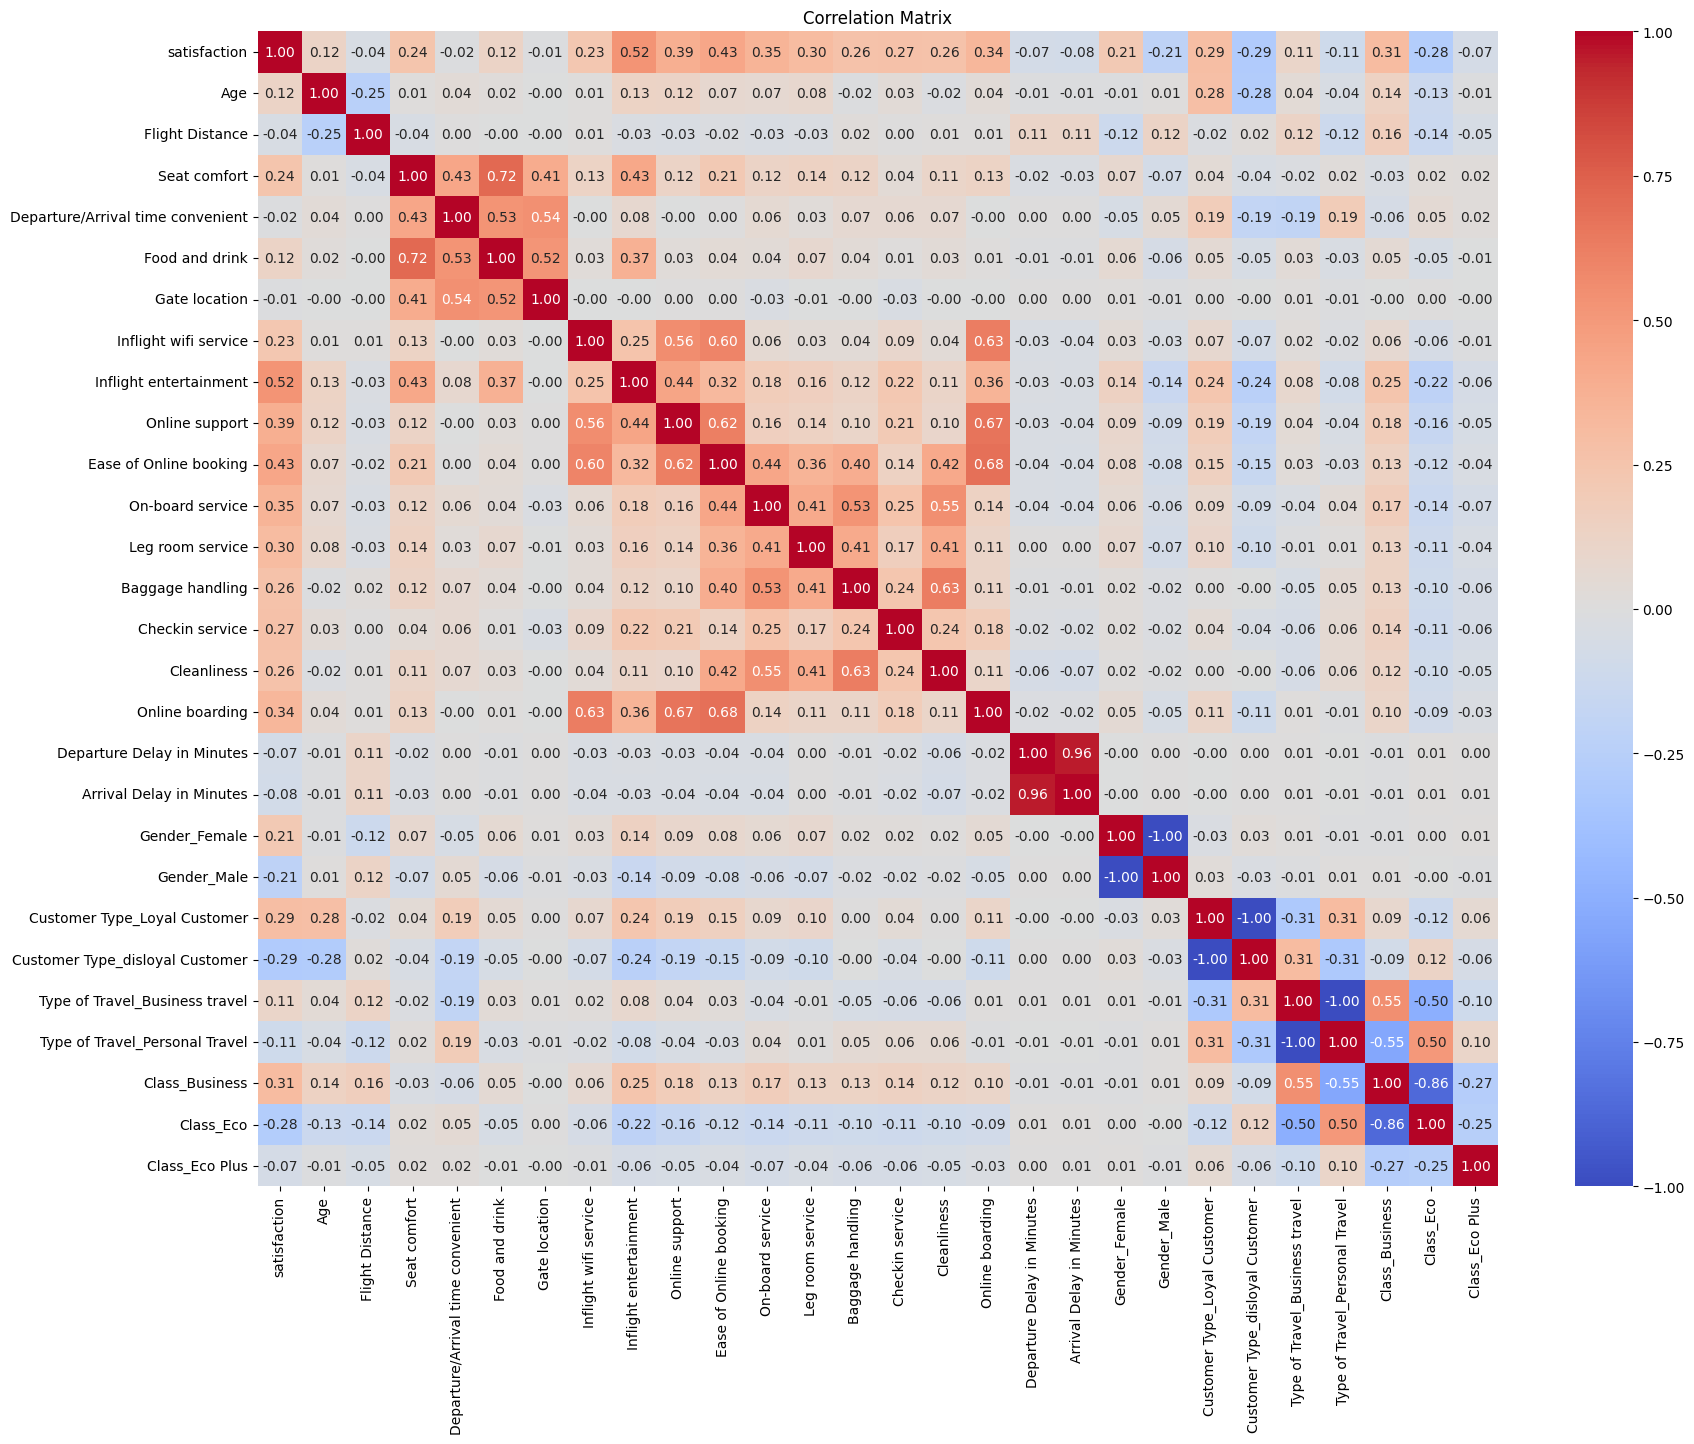

In [6]:
corr = trainData.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
trainData = trainData.drop(columns=['Flight Distance',
    'Departure/Arrival time convenient',
    'Gate location',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'Type of Travel_Personal Travel',
    'Class_Eco Plus','Gender_Male','Customer Type_disloyal Customer', 'Class_Eco'], axis=1)

# Display the info of the updated trainData
print(trainData.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   satisfaction                    129880 non-null  int64
 1   Age                             129880 non-null  int64
 2   Seat comfort                    129880 non-null  int64
 3   Food and drink                  129880 non-null  int64
 4   Inflight wifi service           129880 non-null  int64
 5   Inflight entertainment          129880 non-null  int64
 6   Online support                  129880 non-null  int64
 7   Ease of Online booking          129880 non-null  int64
 8   On-board service                129880 non-null  int64
 9   Leg room service                129880 non-null  int64
 10  Baggage handling                129880 non-null  int64
 11  Checkin service                 129880 non-null  int64
 12  Cleanliness                     129880 non-n

#### **4.4 Scale Numerical Features**

Scale the numerical features using the `StandardScaler` class from scikit-learn.
**Note:** Keep the target column as it is.


In [8]:
X = trainData.drop('satisfaction', axis=1)
y = trainData['satisfaction']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
trainData= pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
print(trainData.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             129880 non-null  float64
 1   Seat comfort                    129880 non-null  float64
 2   Food and drink                  129880 non-null  float64
 3   Inflight wifi service           129880 non-null  float64
 4   Inflight entertainment          129880 non-null  float64
 5   Online support                  129880 non-null  float64
 6   Ease of Online booking          129880 non-null  float64
 7   On-board service                129880 non-null  float64
 8   Leg room service                129880 non-null  float64
 9   Baggage handling                129880 non-null  float64
 10  Checkin service                 129880 non-null  float64
 11  Cleanliness                     129880 non-null  float64
 12  Online boarding 

#### **4.5 Separate Features and Target**

- `X` will contain all the features, and `y` will contain the target column, i.e., `satisfaction`.


In [9]:
X = trainData.drop('satisfaction', axis=1)
y = trainData['satisfaction']

#### **4.6 Feature Engineering**

- You can create new features by combining the existing features that can help improve the model's performance. For example:
    - Mutiply two features to create a new feature.
    - Take the square, cube, or square root of a feature to create a new feature.
    - You also can consider log transformation of the features.
- Create new features from the existing features that can help improve the model's performance. For example, `sklearn.preprocessing.PolynomialFeatures` can be used to create polynomial features.
- From the `sklearn.feature_selection` module you can use methods like `SelectKBest`, `RFECV`, `RFE`, etc., to select the best features.

**Note:** Feature engineering can help improve the model's performance. Bonus points will be awarded if you perform feature engineering that improves the model's performance.


In [10]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Columns: 171 entries, 1 to Class_Business^2
dtypes: float64(171)
memory usage: 169.4 MB
None


In [11]:
k = 50
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Seat comfort', 'Food and drink', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding', 'Gender_Female',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Age^2', 'Seat comfort^2',
       'Seat comfort Food and drink', 'Food and drink^2',
       'Food and drink Customer Type_Loyal Customer',
       'Inflight wifi service^2', 'Inflight wifi service Online support',
       'Inflight wifi service Ease of Online booking',
       'Inflight wifi service Online boarding', 'Online support^2',
       'Online support Ease of Online booking',
       'Online support Online boarding', 'Ease of Online booking^2',
       'Ease of Online booking Online boarding', 'On-board service^2',
       'On-board service Type of Travel_Business travel', 'Leg ro

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
selected_features = list(selected_features)
X = X[selected_features]
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 50 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Age                                                          129880 non-null  float64
 1   Seat comfort                                                 129880 non-null  float64
 2   Food and drink                                               129880 non-null  float64
 3   Inflight wifi service                                        129880 non-null  float64
 4   Inflight entertainment                                       129880 non-null  float64
 5   Online support                                               129880 non-null  float64
 6   Ease of Online booking                                       129880 non-null  float64
 7   On-board service                                             1298

#### **4.7 Split the Data into Training and Testing Sets**

Split the data into features (X) and target (y) variables. Then, split the data into training and testing sets using the `train_test_split` method from scikit-learn.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **5. Logistic Regression Model**

#### **5.1 Sigmoind Function**

Implement the sigmoid function that takes the input and returns the output using the formula $1 / (1 + exp(-x))$.


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### **5.2 Compute the Cost Function**

Write a function to compute the cost function using the formula $-1/m * \sum(y*log(h) + (1-y)*log(1-h))$.


In [15]:
def compute_cost(y, h):
    m = len(y)
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

#### **5.3 Batch Gradient Descent**

Write a function to perform batch gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [16]:
def batch_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for i in range(n_iterations):
        z = np.dot(X, weights) + bias
        h = sigmoid(z)
        dw = 1/m * np.dot(X.T, (h - y))
        db = 1/m * np.sum(h - y)
        weights -= learning_rate * dw
        bias -= learning_rate * db
        # cost
        cost = compute_cost(y, h)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias

#### **5.4 Stochastic Gradient Descent**

Write a function to perform stochastic gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [17]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=10):

    if not isinstance(X, np.ndarray):
        X = np.array(X)
    if not isinstance(y, np.ndarray):
        y = np.array(y)

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(n_iterations):
        for j in range(m):
            z = np.dot(X[j], weights) + bias
            h = sigmoid(z)

            dw = (h - y[j]) * X[j]
            db = (h - y[j])

            weights -= learning_rate * dw
            bias -= learning_rate * db

        # Compute cost
        z = np.dot(X, weights) + bias
        h = sigmoid(z)
        cost = compute_cost(y, h)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias


#### **5.5 Mini-Batch Gradient Descent**

Write a function to perform mini-batch gradient descent to minimize the cost function. The function should return the optimized weights.

```python
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, n_iterations=10):
    # complete the function
    return weights, bias
```


In [18]:
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, n_iterations=10):
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.values
    if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
        y = y.values

    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    for i in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):

            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            z = np.dot(X_batch, weights) + bias
            h = sigmoid(z)

            dw = 1 / batch_size * np.dot(X_batch.T, (h - y_batch))
            db = 1 / batch_size * np.sum(h - y_batch)

            weights -= learning_rate * dw
            bias -= learning_rate * db

        z = np.dot(X, weights) + bias
        h = sigmoid(z)
        cost = compute_cost(y, h)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias


#### **5.6 Predict Function**

Write a function to predict the output using the sigmoid function and the optimized weights.

```python
def predict(X, weights, bias, threshold=0.5):
    # complete the function
    return predictions
```


In [19]:
def predict(X, weights, bias, threshold=0.5):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    predictions = (probabilities >= threshold).astype(int)
    return predictions

#### **5.7 Evaluate function**

Write a function to evaluate the model using accuracy, precision, recall, F1-score, and the confusion matrix. The function should:

- Calculate the confusion matrix using the `confusion_matrix` method from scikit-learn and plot it using the `heatmap` method from the `seaborn` library.
- Calculate and print the accuracy, precision, recall, and F1-score using the `classification_report` method from scikit-learn.

```python
def evaluate_model(y_true, y_pred):
    # complete the function
```


In [20]:
def evaluate_model(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True)
    plt.show()

    report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(report)


#### **5.8 Train and Evaluate the Model**

Train the logistic regression model using the training for each gradient descent algorithm. Evaluate the model using the testing set and the `evaluate_model` function. Steps to follow:

- Call any of the gradient descent functions with the training data to get the optimized weights.
- Use the predict function to get the predictions on the testing data.
- Evaluate the model using the evaluate_model function.

Do this for all three gradient descent algorithms and compare the results.


Iteration 0: Cost 0.6931471805599453
Batch Gradient Descent Results:


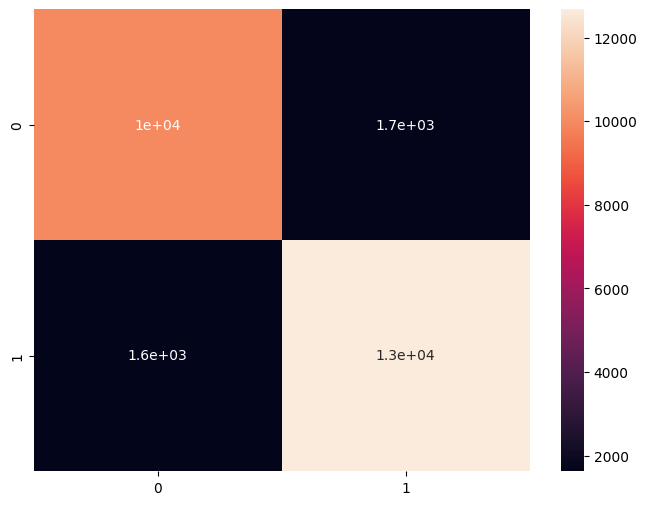

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     11675
           1       0.88      0.89      0.88     14301

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Iteration 0: Cost 0.2462092305074657
Stochastic Gradient Descent Results:


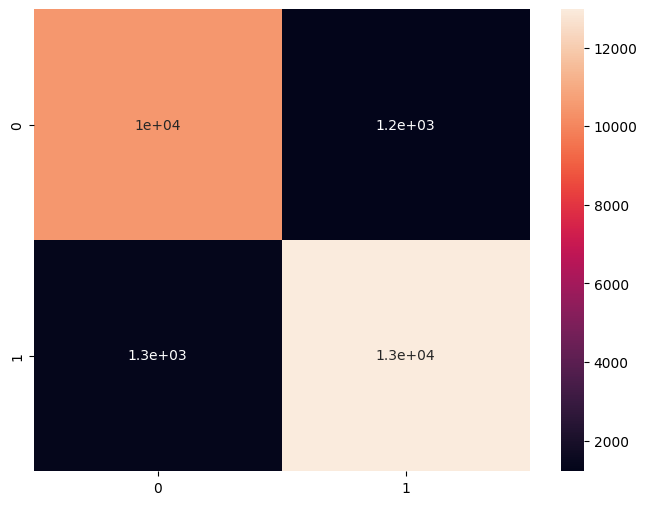

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     11675
           1       0.91      0.91      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976

Iteration 0: Cost 0.24726704537934657
Mini-Batch Gradient Descent Results:


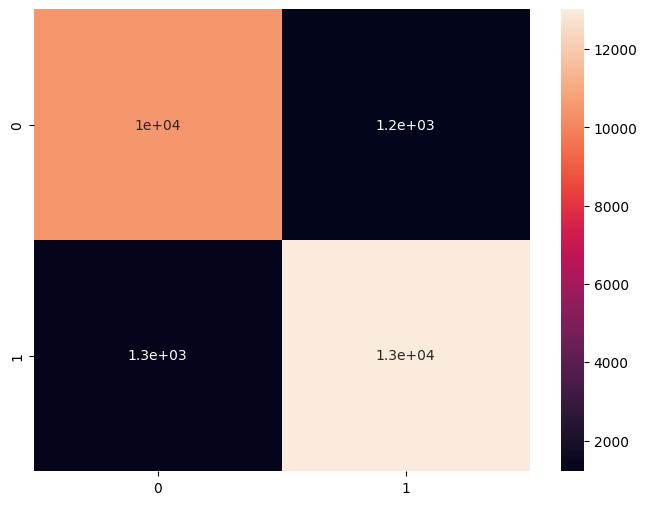

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     11675
           1       0.91      0.91      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



In [21]:
def get_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

batch_weights, batch_bias= batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, batch_weights, batch_bias)
print("Batch Gradient Descent Results:")
evaluate_model(y_test, y_pred_batch)
batch_metrics = get_evaluation_metrics(y_test, y_pred_batch)

stochastic_weights, stochastic_bias= stochastic_gradient_descent(X_train, y_train)
y_pred_stochastic = predict(X_test, stochastic_weights, stochastic_bias)
print("Stochastic Gradient Descent Results:")
evaluate_model(y_test, y_pred_stochastic)
stochastic_metrics = get_evaluation_metrics(y_test, y_pred_stochastic)

mini_batch_weights, mini_batch_bias = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, mini_batch_weights, mini_batch_bias)
print("Mini-Batch Gradient Descent Results:")
evaluate_model(y_test, y_pred_mini_batch)
mini_batch_metrics = get_evaluation_metrics(y_test, y_pred_mini_batch)


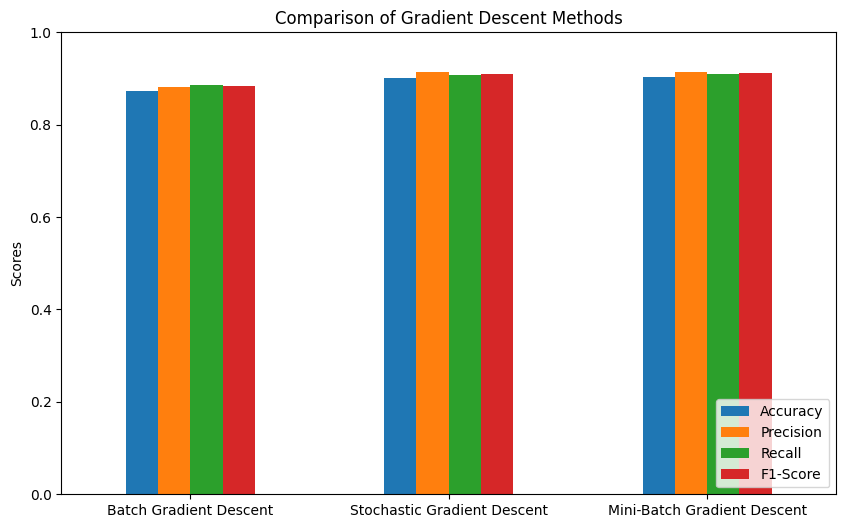

In [22]:
metrics_df = pd.DataFrame({
    'Batch Gradient Descent': batch_metrics,
    'Stochastic Gradient Descent': stochastic_metrics,
    'Mini-Batch Gradient Descent': mini_batch_metrics
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Gradient Descent Methods')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()